# 项目：指导四轴飞行器学会飞行

设计一个能够使四轴飞行器飞行的智能体，然后使用你选择的强化学习算法训练它！

请尝试运用你在这一单元中学到的知识，看看哪个方法效果最好，当然你也可以自己想出创新型方法并测试它们。
## 说明

请查看目录下的文件，以更好地了解项目结构。 

- `task.py`：在本文件中定义你的任务（环境）。
- `agents/`：本文件夹中包含强化学习智能体。
    - `policy_search.py`：我们为你提供了一个智能体模板。
    - `agent.py`：在本文件中开发你的智能体。
- `physics_sim.py`：本文件中包含四轴飞行器模拟器。**请勿修改本文件**。

在本项目中，你需要在 `task.py` 中定义你的任务。尽管我们为你提供了一个任务示例，来帮助你开始项目，但你也可以随意更改这个文件。在这个 notebook 中，你还将学习更多有关修改这个文件的知识。

你还需要在 `agent.py` 中设计一个强化学习智能体，来完成你选择的任务。

我们也鼓励你创建其他文件，来帮助你整理代码。比如，你也许可以通过定义一个 `model.py` 文件来定义其他你需要的神经网络结构。

## 控制四轴飞行器

在下方的代码中，我们提供了一个智能体示例，来示范如何使用模拟器来控制四轴飞行器。这个智能体比你在 notebook 中需要测试的智能体（在 `agents/policy_search.py` 中）更加简单！

这个智能体通过设置飞行器四个轴上的转速来控制飞行器。`Basic_Agent` 类中提供的智能体将会随机为四个轴指定动作。这四个速度将通过 `act` 方法以四个浮点数列表的形式返回。


在本项目中，你将在 `agents/agent.py` 中实现的智能体会以更加智能的方法进行指定的动作。

### plot

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_run(results, standalone=True):
    if standalone:
        plt.subplots(figsize=(15, 15))
    
    #查看四轴飞行器的位置变化
    plt.subplot(3, 3, 1)
    plt.title('Position')
    plt.plot(results['time'], results['x'], label='x')
    plt.plot(results['time'], results['y'], label='y')
    plt.plot(results['time'], results['z'], label='z')
    plt.xlabel('time, seconds')
    plt.ylabel('Position')
    plt.grid(True)
    if standalone:
        plt.legend()

    #四轴飞行器的速度
    plt.subplot(3, 3, 2)
    plt.title('Velocity')
    plt.plot(results['time'], results['x_velocity'], label='x_hat')
    plt.plot(results['time'], results['y_velocity'], label='y_hat')
    plt.plot(results['time'], results['z_velocity'], label='z_hat')
    plt.xlabel('time, seconds')
    plt.ylabel('Velocity')
    plt.grid(True)
    if standalone:
        plt.legend()
    
    #绘制欧拉角 (Euler angles)（四轴飞行器围绕 x，y 和 z 轴的旋转）的图表
    plt.subplot(3, 3, 3)
    plt.title('Orientation')
    plt.plot(results['time'], results['phi'], label='phi')
    plt.plot(results['time'], results['theta'], label='theta')
    plt.plot(results['time'], results['psi'], label='psi')
    plt.xlabel('time, seconds')
    plt.grid(True)
    if standalone:
        plt.legend()
    
    #绘制每个欧拉角的速度（每秒的弧度）图
    plt.subplot(3, 3, 4)
    plt.title('Angular Velocity')
    plt.plot(results['time'], results['phi_velocity'], label='phi')
    plt.plot(results['time'], results['theta_velocity'], label='theta')
    plt.plot(results['time'], results['psi_velocity'], label='psi')
    plt.xlabel('time, seconds')
    plt.grid(True)
    if standalone:
        plt.legend()

    #最后，你可以使用下方代码来输出智能体选择的动作。
    plt.subplot(3, 3, 5)
    plt.title('Rotor Speed')
    plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1')
    plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2')
    plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3')
    plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4')
    plt.xlabel('time, seconds')
    plt.ylabel('Rotor Speed, revolutions / second')
    plt.grid(True)
    if standalone:
        plt.legend()

    if standalone:
        plt.tight_layout()
        plt.show()

In [2]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def plot_point3d(ax, x, y, z, **kwargs):
    ax.scatter([x], [y], [z], **kwargs)
    ax.text(x, y, z, "({:.1f}, {:.1f}, {:.1f})".format(x, y, z))


def show_flight_path(results, target=None):
    results = np.array(results)
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

    ax.plot3D(results[:, 0], results[:, 1], results[:, 2], 'gray')
    
    if target is not None:
        plot_point3d(ax, *target[0:3], c='y', marker='x', s=100, label='target')
        
    plot_point3d(ax, *results[0, 0:3], c='g', marker='o', s=50, label='start')
    plot_point3d(ax, *results[-1, 0:3], c='r', marker='o', s=50, label='end')
    
    ax.legend()

### random Agent

In [3]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

运行下方代码，让智能体指定动作来控制四轴飞行器。

请随意更改我们提供的 `runtime`，`init_pose`，`init_velocities` 和 `init_angle_velocities` 值来更改四轴飞行器的初始条件。

下方的 `labels` 列表为模拟数据的注释。所有的信息都储存在 `data.txt` 文档中，并保存在 `results` 目录下。

In [4]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

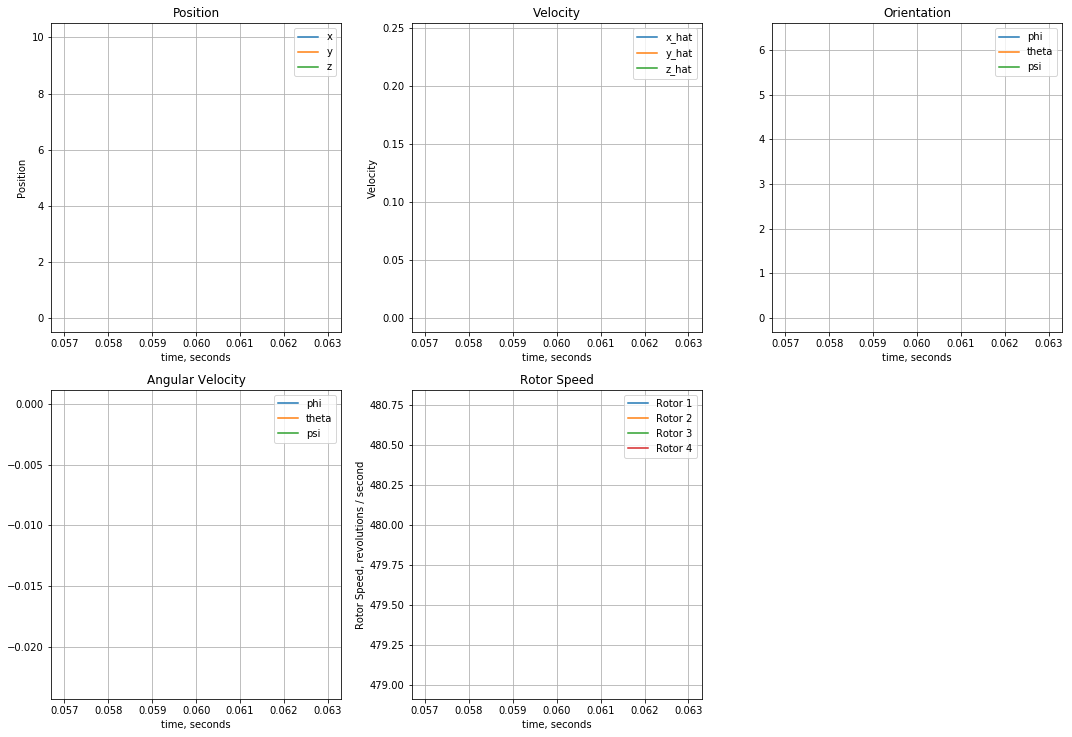

In [5]:
plot_run(results)

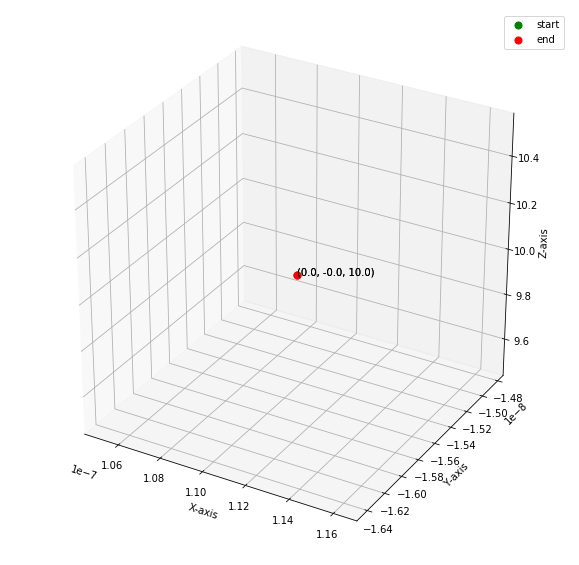

In [6]:
path = [[results['x'][i], results['y'][i], results['z'][i]] for i in range(len(results['x']))]
show_flight_path(path, target=None)

在指定任务之前，你需要在模拟器中衍生环境状态。运行下方代码来在模拟结束时输出以下变量值：

- `task.sim.pose`：四周飞行器在 ($x,y,z$) 坐标系中的位置和欧拉角。
- `task.sim.v`：四轴飞行器在 ($x,y,z$) 坐标系中的速度。
- `task.sim.angular_v`：三个欧拉角的弧度/每秒。

In [7]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  1.10709668e-07  -1.56237652e-08   1.00072618e+01   6.28281200e+00
   6.28296635e+00   0.00000000e+00]
[  1.56388094e-05  -1.80067467e-05   2.42040435e-01]
[-0.02312055 -0.01218588  0.        ]


在 `task.py` 中的任务示例中，我们使用了四轴飞行器六个维度的动作来构建每个时间步的环境状态。然而，你也可以按照自己的意愿更改任务，你可以添加速度信息来扩大状态向量，也可以使用任何动作、速度和角速度的组合，并构造适用于你的任务的环境状态。

## 任务

在 `task.py` 中，我们为你提供了一个任务示例。请在新窗口中打开这个文件。

使用 `__init__()` 方法来初始化指定本任务所需的几个变量。

- 模拟器作为 `PhysicsSim` 类（来自 `physics_sim.py` 文件）的示例进行初始化。
- 受到 DDPG 论文中研究方法的启发，我们使用了重复调用动作的方法。对于智能体的每一个时间步，我们将利用 `action_repeats` 时间步来进行模拟。如果你并不熟悉这种方法，可以阅读 [DDPG 论文](https://arxiv.org/abs/1509.02971)的结论部分。
- 我们设置了状态向量中每个分量的数值。在任务示例中，我们只设置了六个维度的动作信息。为了设定向量大小（`state_size`），我们必须考虑重复的动作。
- 任务环境通常是一个四维动作空间，每个轴有一个输入（`action_size=4`）。你可以设置每个输入的最小值（`action_low`）和最大值（`action_high`）。
- 我们在文件中提供的任务示例将使智能体达到目标位置。我们将目标位置设置为一个变量。

`reset()` 方法将重置模拟器。每当阶段结束时，智能体都将调用此方法。你可以查看下方代码中的例子。

`step()` 方法是最重要的一个方法。它将接收智能体选择的动作 `rotor_speeds`，并准备好下一个状态，同时返回给智能体。接着，你将通过 `get_reward()` 计算奖励值。当超过规定时间，或是四轴飞行器到达模拟器边缘时，这一阶段将视作结束。

接下来，你将学习如何测试这个任务中智能体的性能。

## 智能体

`agents/policy_search.py` 文件中提供的智能体示例使用了非常简单的线性策略，将动作向量视作状态向量和矩阵权重的点积直接进行计算。接着，它通过添加一些高斯噪声来随机干扰参数，以产生不同的策略。根据每个阶段获得的平均奖励值（`score`），它将记录迄今为止发现的最佳参数集以及分数的变化状态，并据此调整比例因子来扩大或减少噪音。

请运行下方代码来查看任务示例中智能体的性能。

In [8]:
import sys
import pandas as p

In [9]:
from agents.policy_search import PolicySearch_Agent
from task import Task

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

num_episodes = 1
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        if i_episode == num_episodes:
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =    1, score =   2.957 (best =   2.957), noise_scale = 0.05

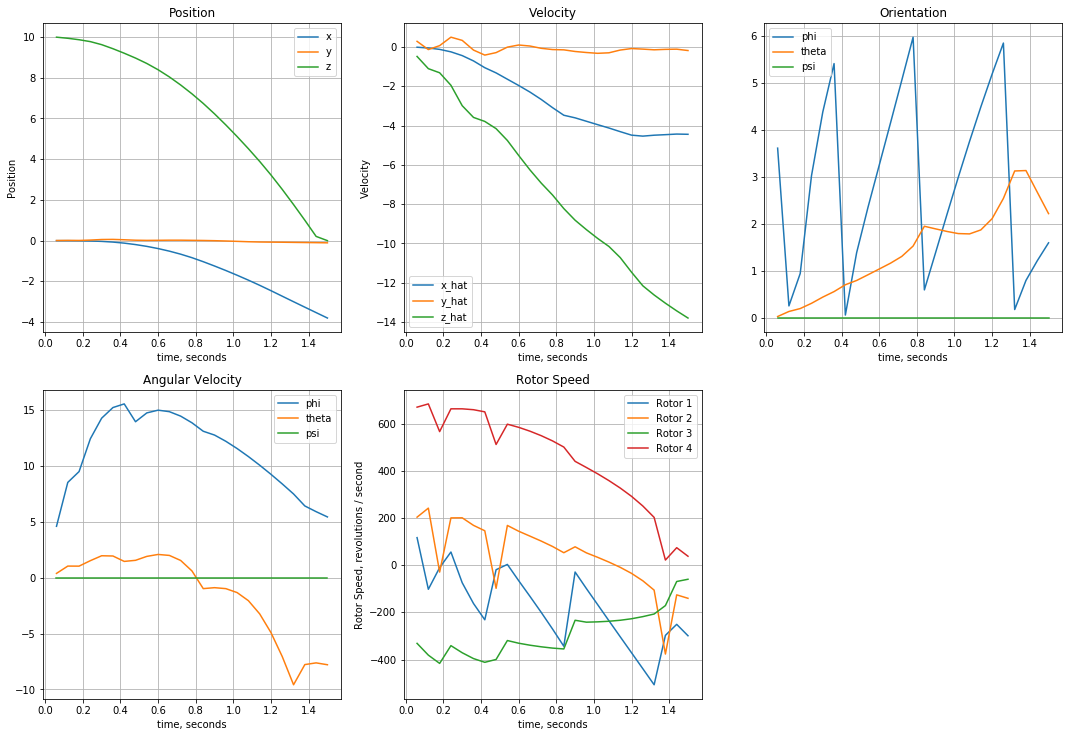

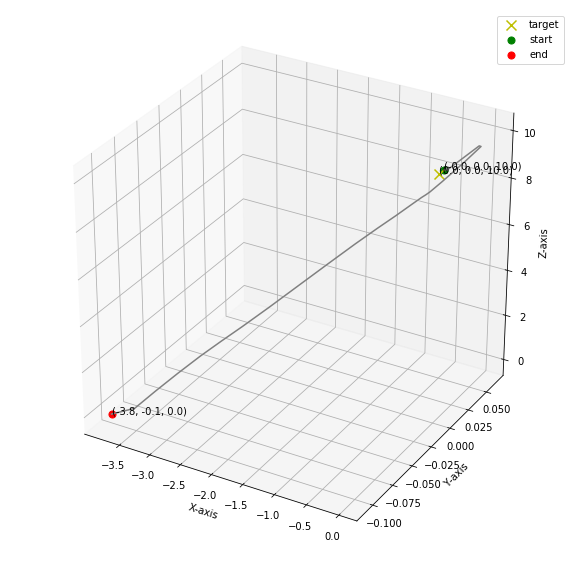

In [10]:
plot_run(results)

path = [[results['x'][i], results['y'][i], results['z'][i]] for i in range(len(results['x']))]
show_flight_path(path, target=target_pos)

这个智能体的性能想必十分糟糕！现在轮到你出场了！

## 定义任务，设计并训练你的智能体！

修改 `task.py` 文件来指定你所选择的任务。如果你不确定选择什么任务，你可以教你的四轴飞行器起飞、盘旋、着陆或是达到指定位置。


在指定任务后，使用 `agents/policy_search.py` 中的智能体示例作为模板，来在 `agents/agent.py` 中定义你自己的智能体。你可以随意从智能体示例中借用你需要的元素，包括如何模块化你的代码（使用 `act()`，`learn()` 和 `reset_episode_vars()` 等辅助方法）。

请注意，你指定的第一个智能体和任务**极有可能**无法顺利进行学习。你将需要改进不同的超参数和奖励函数，直到你能够获得不错的结果。

在开发智能体的时候，你还需要关注它的性能。参考下方代码，建立一个机制来存储每个阶段的总奖励值。如果阶段奖励值在逐渐上升，说明你的智能体正在学习。

In [18]:
## TODO: Train your agent here.
from task import Task
from agents.agent1 import agent1
import numpy as np
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}
init_pose = np.array([0., 0., 1., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities

num_episodes = 1500
target_pos = np.array([0., 0., 10.])
task = Task(init_pose = init_pose,init_velocities = init_velocities,init_angle_velocities = init_angle_velocities,target_pos=target_pos)

agent = agent1(task) 

In [ ]:
Episode = list()
Total_reward = list()
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    total_reward = 0 
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action,reward,next_state,done)
        total_reward += reward
        state = next_state     
        if done:
            print('Episode: {}'.format(i_episode),
            'Total reward: {}'.format(total_reward))
            Episode.append(i_episode)
            Total_reward.append(total_reward)
            break 
    sys.stdout.flush()


Episode: 1 Total reward: 32.04762126590914
Episode: 2 Total reward: 32.047669797577356
Episode: 3 Total reward: 32.04768433433219
Episode: 4 Total reward: 32.05220862730452
Episode: 5 Total reward: 29.130031453755795
Episode: 6 Total reward: 55.16589245143242
Episode: 7 Total reward: 46.51472197590401
Episode: 8 Total reward: 32.03717631391673
Episode: 9 Total reward: 34.95724140401267
Episode: 10 Total reward: 32.052274993600946
Episode: 11 Total reward: 32.05185181143358
Episode: 12 Total reward: 29.149137123367947
Episode: 13 Total reward: 29.145292500254985
Episode: 14 Total reward: 32.046933230262326
Episode: 15 Total reward: 29.13973133263289
Episode: 16 Total reward: 32.0395137562723
Episode: 17 Total reward: 32.03472401002436
Episode: 18 Total reward: 32.03277974939625
Episode: 19 Total reward: 32.02588069146005
Episode: 20 Total reward: 32.02669844304128
Episode: 21 Total reward: 29.141490183410742
Episode: 22 Total reward: 29.148838257383623
Episode: 23 Total reward: 32.02442

Episode: 184 Total reward: 40.57558859359787
Episode: 185 Total reward: 29.05216310738955
Episode: 186 Total reward: 26.182343103115
Episode: 187 Total reward: 31.95450896393377
Episode: 188 Total reward: 37.84890841173707
Episode: 189 Total reward: 37.852301820313485
Episode: 190 Total reward: 26.178050676202798
Episode: 191 Total reward: 32.01364466173348
Episode: 192 Total reward: 46.409905674088016
Episode: 193 Total reward: 23.316699102167945
Episode: 194 Total reward: 20.404744232387827
Episode: 195 Total reward: 29.130391166771435
Episode: 196 Total reward: 26.208504337034014
Episode: 197 Total reward: 34.9686175083624
Episode: 198 Total reward: 23.31035618604926
Episode: 199 Total reward: 20.401615917291874
Episode: 200 Total reward: 20.39728695694826
Episode: 201 Total reward: 20.39411457254608
Episode: 202 Total reward: 26.188759102109547
Episode: 203 Total reward: 26.21003154368644
Episode: 204 Total reward: 43.646080895146866
Episode: 205 Total reward: 20.379517072704488
Ep

Episode: 364 Total reward: 23.305291911769796
Episode: 365 Total reward: 23.305365059367006
Episode: 366 Total reward: 23.309090717880494
Episode: 367 Total reward: 23.30989558210427
Episode: 368 Total reward: 23.301730441581824
Episode: 369 Total reward: 29.104146323545166
Episode: 370 Total reward: 32.01619410996303
Episode: 371 Total reward: 26.21454814293428
Episode: 372 Total reward: 26.214506438010332
Episode: 373 Total reward: 26.213548495024607
Episode: 374 Total reward: 23.307257708681714
Episode: 375 Total reward: 23.30437090282604
Episode: 376 Total reward: 23.303324237002776
Episode: 377 Total reward: 23.30404959948068
Episode: 378 Total reward: 23.303235061361498
Episode: 379 Total reward: 23.302527360115572
Episode: 380 Total reward: 23.304734702127746
Episode: 381 Total reward: 26.19858918084527
Episode: 382 Total reward: 26.212455042398304
Episode: 383 Total reward: 26.206690337786064
Episode: 384 Total reward: 26.203632026089767
Episode: 385 Total reward: 26.2121490645

Episode: 544 Total reward: 239.75552079804257
Episode: 545 Total reward: 239.45802727922248
Episode: 546 Total reward: 239.31662436388314
Episode: 547 Total reward: 238.5221001855831
Episode: 548 Total reward: 239.31501851770187
Episode: 549 Total reward: 239.1668306888113
Episode: 550 Total reward: 237.81504731656548
Episode: 551 Total reward: 239.4972171554279
Episode: 552 Total reward: 237.83407917837343
Episode: 553 Total reward: 238.53429487030522
Episode: 554 Total reward: 237.0080075413062
Episode: 555 Total reward: 238.9712730453238
Episode: 556 Total reward: 238.1895459007225
Episode: 557 Total reward: 238.54844827274025
Episode: 558 Total reward: 238.47695559195827
Episode: 559 Total reward: 237.52688893987545
Episode: 560 Total reward: 238.35730314998608
Episode: 561 Total reward: 238.4321874863489
Episode: 562 Total reward: 239.22451658122526
Episode: 563 Total reward: 238.38222334791698
Episode: 564 Total reward: 238.26931412690573
Episode: 565 Total reward: 239.8908343230

Episode: 724 Total reward: 237.4293219138397
Episode: 725 Total reward: 238.3075021341142
Episode: 726 Total reward: 237.57375598360585
Episode: 727 Total reward: 238.2027847033213
Episode: 728 Total reward: 237.57470710619472
Episode: 729 Total reward: 238.82596486706584
Episode: 730 Total reward: 238.39845577634108
Episode: 731 Total reward: 239.3225801927922
Episode: 732 Total reward: 239.41341498481796
Episode: 733 Total reward: 240.56634586170532
Episode: 734 Total reward: 239.61147013050464
Episode: 735 Total reward: 238.96204836538692
Episode: 736 Total reward: 238.79799352410103
Episode: 737 Total reward: 238.4164073601363
Episode: 738 Total reward: 239.34963815916169
Episode: 739 Total reward: 238.4470355492808
Episode: 740 Total reward: 238.66512383552742
Episode: 741 Total reward: 237.7989443835528
Episode: 742 Total reward: 237.21341827832535
Episode: 743 Total reward: 237.51951322499832
Episode: 744 Total reward: 237.76285075067372
Episode: 745 Total reward: 237.7720944635

Episode: 904 Total reward: 240.9919929522509
Episode: 905 Total reward: 239.95940014596377
Episode: 906 Total reward: 241.06057073244637
Episode: 907 Total reward: 240.2405397259817
Episode: 908 Total reward: 240.36853614556168
Episode: 909 Total reward: 240.12812341566536
Episode: 910 Total reward: 239.98515867550714
Episode: 911 Total reward: 240.1294516281133
Episode: 912 Total reward: 240.48788632933213
Episode: 913 Total reward: 240.15717683536045
Episode: 914 Total reward: 239.36822518736298
Episode: 915 Total reward: 240.36737054955412
Episode: 916 Total reward: 239.79620018220976
Episode: 917 Total reward: 239.43850881595267
Episode: 918 Total reward: 240.40989956549694
Episode: 919 Total reward: 240.3977870661193
Episode: 920 Total reward: 240.056507782054
Episode: 921 Total reward: 240.95016205447303
Episode: 922 Total reward: 240.7129110888342
Episode: 923 Total reward: 239.80682042274373
Episode: 924 Total reward: 240.6833158073459
Episode: 925 Total reward: 95.770013017625

Episode: 1082 Total reward: 240.72243889608944
Episode: 1083 Total reward: 240.74561299177887
Episode: 1084 Total reward: 241.09022768709195
Episode: 1085 Total reward: 240.5151704837665
Episode: 1086 Total reward: 240.47632536359302
Episode: 1087 Total reward: 240.37382505034327
Episode: 1088 Total reward: 101.14998601078345
Episode: 1089 Total reward: 241.0673103752921
Episode: 1090 Total reward: 240.8478068118601
Episode: 1091 Total reward: 240.79539133851006
Episode: 1092 Total reward: 240.13961114228292
Episode: 1093 Total reward: 241.4251994331955
Episode: 1094 Total reward: 240.3283485840682
Episode: 1095 Total reward: 240.1438960092492
Episode: 1096 Total reward: 239.92269245467998
Episode: 1097 Total reward: 241.04060836048052
Episode: 1098 Total reward: 240.7760982501493
Episode: 1099 Total reward: 240.76482914699895
Episode: 1100 Total reward: 240.68327870973505
Episode: 1101 Total reward: 240.49582286134313
Episode: 1102 Total reward: 240.8739835743697
Episode: 1103 Total r

Episode: 1258 Total reward: 240.94457149114706
Episode: 1259 Total reward: 240.02641167285728
Episode: 1260 Total reward: 240.41464149982437
Episode: 1261 Total reward: 240.55730160796423
Episode: 1262 Total reward: 240.67023467576925
Episode: 1263 Total reward: 240.46385712868752
Episode: 1264 Total reward: 240.67435482840202
Episode: 1265 Total reward: 240.0688476111255
Episode: 1266 Total reward: 241.09276124020633
Episode: 1267 Total reward: 241.60688151366062
Episode: 1268 Total reward: 240.88330395385327
Episode: 1269 Total reward: 240.49218773952268
Episode: 1270 Total reward: 239.32128424678137
Episode: 1271 Total reward: 240.2677097440026
Episode: 1272 Total reward: 240.9331252441289
Episode: 1273 Total reward: 241.7479457583299
Episode: 1274 Total reward: 241.27667335904718
Episode: 1275 Total reward: 240.8960027420024
Episode: 1276 Total reward: 239.63684199732694
Episode: 1277 Total reward: 241.0271887513774
Episode: 1278 Total reward: 240.1770536588257
Episode: 1279 Total 

Episode: 1434 Total reward: 240.76971754922027
Episode: 1435 Total reward: 241.28590877714825
Episode: 1436 Total reward: 240.49783563426737
Episode: 1437 Total reward: 241.08580043938275
Episode: 1438 Total reward: 240.70155071961196
Episode: 1439 Total reward: 240.38790929110235
Episode: 1440 Total reward: 240.62932375236159
Episode: 1441 Total reward: 241.62178552268279
Episode: 1442 Total reward: 241.0473847705213
Episode: 1443 Total reward: 240.65627623653344
Episode: 1444 Total reward: 240.51127303451946
Episode: 1445 Total reward: 240.82081231785904
Episode: 1446 Total reward: 241.50277425502946
Episode: 1447 Total reward: 241.41448459332608
Episode: 1448 Total reward: 239.96230158588617
Episode: 1449 Total reward: 241.60890390949623
Episode: 1450 Total reward: 240.799615272816
Episode: 1451 Total reward: 240.78720949271735
Episode: 1452 Total reward: 241.5989364691773
Episode: 1453 Total reward: 241.5657516246346
Episode: 1454 Total reward: 240.0414129662727
Episode: 1455 Total

## 绘制阶段奖励

请绘制智能体在每个阶段中获得的总奖励，这可以是单次运行的奖励值，也可以是多次运行的平均值。

In [ ]:
## TODO: Plot the rewards.

plt.xlabel('Episode')
plt.ylabel('Total_reward')

plt.plot(Episode,Total_reward) 

## 回顾

**问题 1**：请描述你在 `task.py` 中指定的任务。你如何设计奖励函数？

**回答**：任务为从（0,0,1）出发到达点（0,0,10）.奖励函数为1.-.03*(abs(self.sim.pose[:3] - self.target_pos)).sum()。如果到达指定高度，奖励加10.


**问题 2**：请简要描述你的智能体，你可以参考以下问题：

- 你尝试了哪些学习算法？哪个效果最好？
- 你最终选择了哪些超参数（比如 $\alpha$，$\gamma$，$\epsilon$ 等）？
- 你使用了什么样的神经网络结构（如果有的话）？请说明层数、大小和激活函数等信息。

**回答**：
使用了DDPG算法。
神经网络层数为3层，第一层32个units，第二层64个units，第三层32个units。激活函数为‘relu’
超参数分别为：theta = 0.15，sigma = 0.1，gamma = 0.99，tau = 0.01


**问题 3**：根据你绘制的奖励图，描述智能体的学习状况。

- 学习该任务是简单还是困难？
- 该学习曲线中是否存在循序渐进或急速上升的部分？
- 该智能体的最终性能有多好？（比如最后十个阶段的平均奖励值）

**回答**：
该学习任务较简单。在曲线中除开始时无急速上升部分。最终奖励在27.8左右。


**问题 4**：请简要总结你的本次项目经历。你可以参考以下问题：

- 本次项目中最困难的部分是什么？（例如开始项目、运行 ROS、绘制、特定的任务等。）
- 关于四轴飞行器和你的智能体的行为，你是否有一些有趣的发现？

**回答**：
项目中最困难的部分是对飞行体的动作没有直观的感受，如果能规定动作再进行建模及算法训练效果会更好。
奖励函数的定义十分重要，在确定奖励合理之后一切做起来比较得心应手。
对于done的设计也较重要，防止智能体过度飞行超出范围报错。



### (可选)Plot Actor 及 Critic 结构
建议使用 ```from keras.utils import plot_model``` 来显示模型结构；